In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA

from scipy.stats import pearsonr

In [2]:
# Ignorar mensajes de advertencia para mejorar la legibilidad
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Establecer el estilo de las gráficas utilizando el estilo 'ggplot'
plt.style.use('ggplot')

# **Data Analysis and Visualization**

***Breast Cancer Wisconsin (Diagnostic) Dataset***

------------------------------------------

**Descripción del Dataset**

- Numero de Instancias: 569

-  *Features*

	* radius (media de las distancias desde el centro a los puntos del perímetro)

	* texture (desviación estándar de los valores en escala de grises)

	* perimeter

	* area

	* smoothness (variación local de las longitudes del radio)

	* compactness (perímetro^2 / área - 1,0)

	* concavity  (gravedad de las partes cóncavas del contorno)

	* concave points (número de porciones cóncavas del contorno)

	* symmetry

	* fractal dimension (‘aproximación de la línea de costa’ - 1)

La media (mean), el error estándar (standard error) y el peor/mayor (worst) de estas características se calcularon para cada imagen, dando como resultado 30 características.

- *Target*

	* 0 = Maligno

	* 1 = Benigno


In [4]:
# Cargar el dataset 'Breast Cancer Wisconsin'
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [5]:
# Imprimir las dimensiones del conjunto de features (X) y del conjunto de labels (y)
print('dim(X) =', X.shape)
print('dim(y) =', y.shape)

dim(X) = (569, 30)
dim(y) = (569,)


Number of Benign: 357
Number of Malignant: 212


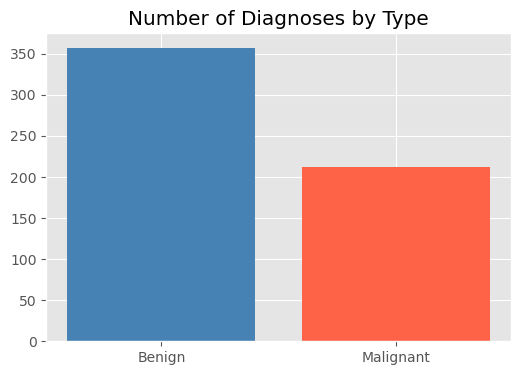

In [6]:
# Contar el número de etiquetas benignas (B) y malignas (M) en el dataset
B, M = y.value_counts()

# Imprimir el número de diagnósticos benignos y malignos
print('Number of Benign:', B)
print('Number of Malignant:', M)

# Crear un gráfico de barras para visualizar la distribución de diagnósticos
plt.figure(figsize=(6, 4))
plt.bar(['Benign', 'Malignant'], [B, M], color=['steelblue', 'tomato'])
plt.title('Number of Diagnoses by Type')
plt.show()

Como se puede observar en los 569 diagnósticos, 357 corresponden a casos benignos y 212 a casos malignos. En otras palabras, el 63% de los diagnósticos indican tumores benignos, mientras que el 37% señalan tumores malignos.

In [7]:
# Mostrar las primeras filas del conjunto de features (X)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Mostrar estadísticas descriptivas del conjunto de features (X)
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Antes de visualizar las features, procederemos a normalizarlas, ya que las diferencias entre sus valores son demasiado altos para representarlas en un mismo gráfico.

In [9]:
# Normalizar el conjunto de features (Z-score)
Z = (X - X.mean()) / X.std()

In [10]:
# Mapear las labels a nombres más descriptivos y renombrar la serie
diagnosis = y.map({
    0:'Malignant',
    1:'Benign'
})
diagnosis = diagnosis.rename('diagnosis')

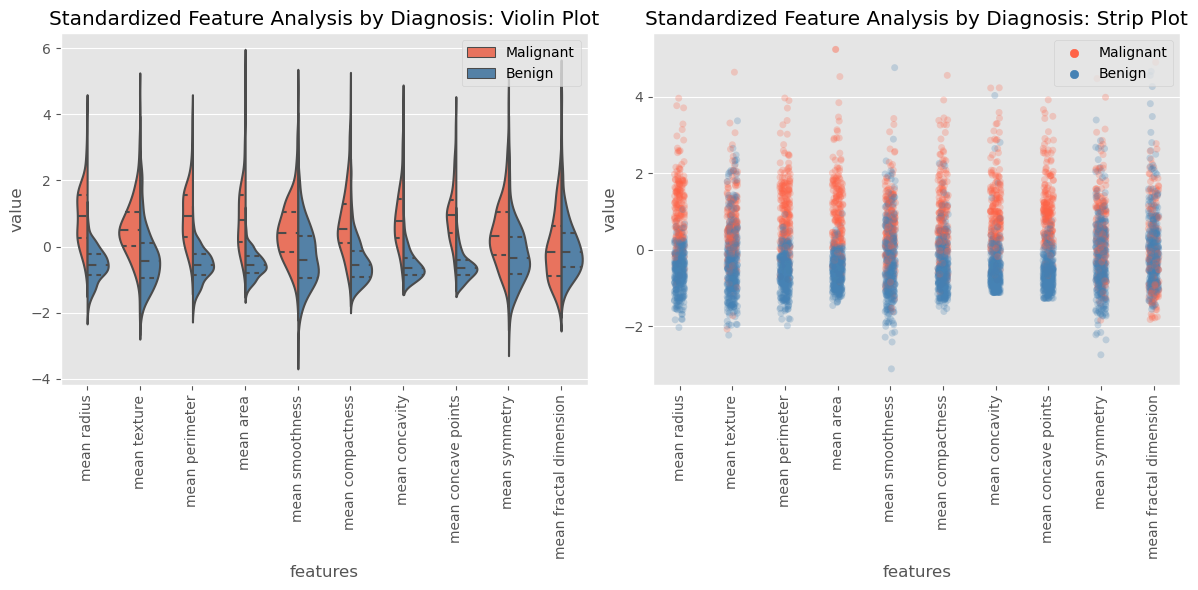

In [11]:
# Crear un DataFrame combinando las primeras 10 features normalizadas y la serie 'diagnosis'
data = pd.concat([Z.iloc[:, :10], diagnosis], axis=1)

# Convertir el DataFrame a un formato adecuado para gráficos de violín y strip
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

# Crear un gráfico de violín y un gráfico de strip para analizar las features normalizadas por diagnóstico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=data, x='features', y='value', hue='diagnosis', split=True, inner='quart', palette={'Benign': 'steelblue', 'Malignant': 'tomato'})
plt.xticks(rotation=90)
plt.title('Standardized Feature Analysis by Diagnosis: Violin Plot')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.stripplot(data=data, x='features', y='value', hue='diagnosis', alpha=0.25, palette={'Benign': 'steelblue', 'Malignant': 'tomato'})
plt.xticks(rotation=90)
plt.title('Standardized Feature Analysis by Diagnosis: Strip Plot')
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()


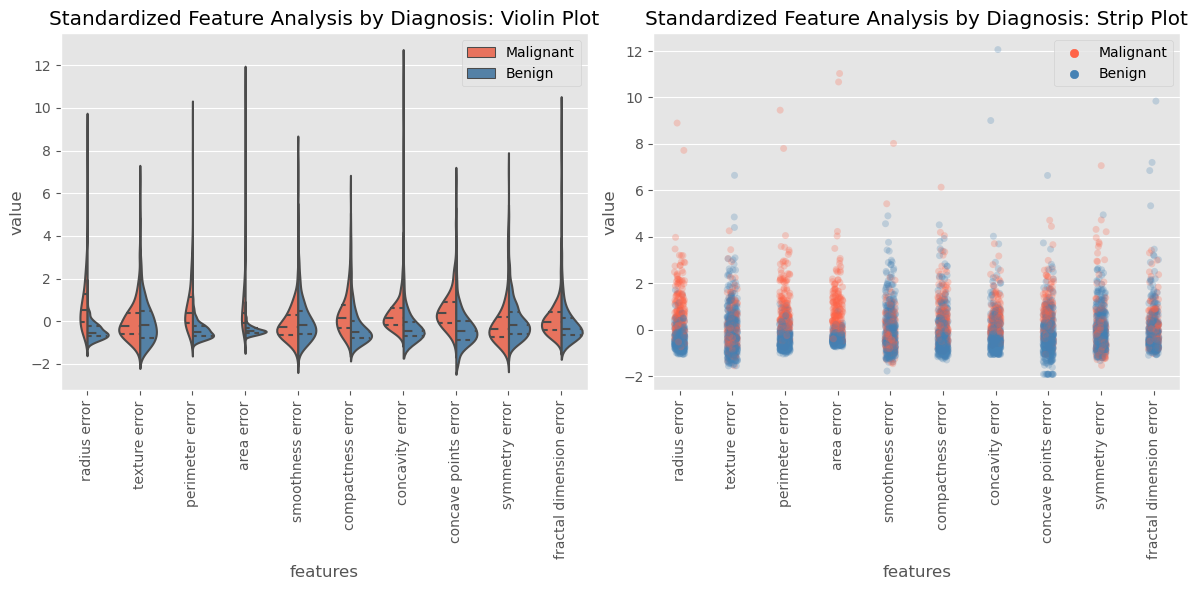

In [12]:
# Crear un DataFrame combinando las features normalizadas de la columna 10 a 19 y la serie 'diagnosis'
data = pd.concat([Z.iloc[:, 10:20], diagnosis], axis=1)

# Convertir el DataFrame a un formato adecuado para gráficos de violín y strip
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

# Crear un gráfico de violín y un gráfico de strip para analizar las features normalizadas por diagnóstico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=data, x='features', y='value', hue='diagnosis', split=True, inner='quart', palette={'Benign': 'steelblue', 'Malignant': 'tomato'})
plt.xticks(rotation=90)
plt.title('Standardized Feature Analysis by Diagnosis: Violin Plot')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.stripplot(data=data, x='features', y='value', hue='diagnosis', alpha=0.25, palette={'Benign': 'steelblue', 'Malignant': 'tomato'})
plt.xticks(rotation=90)
plt.title('Standardized Feature Analysis by Diagnosis: Strip Plot')
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

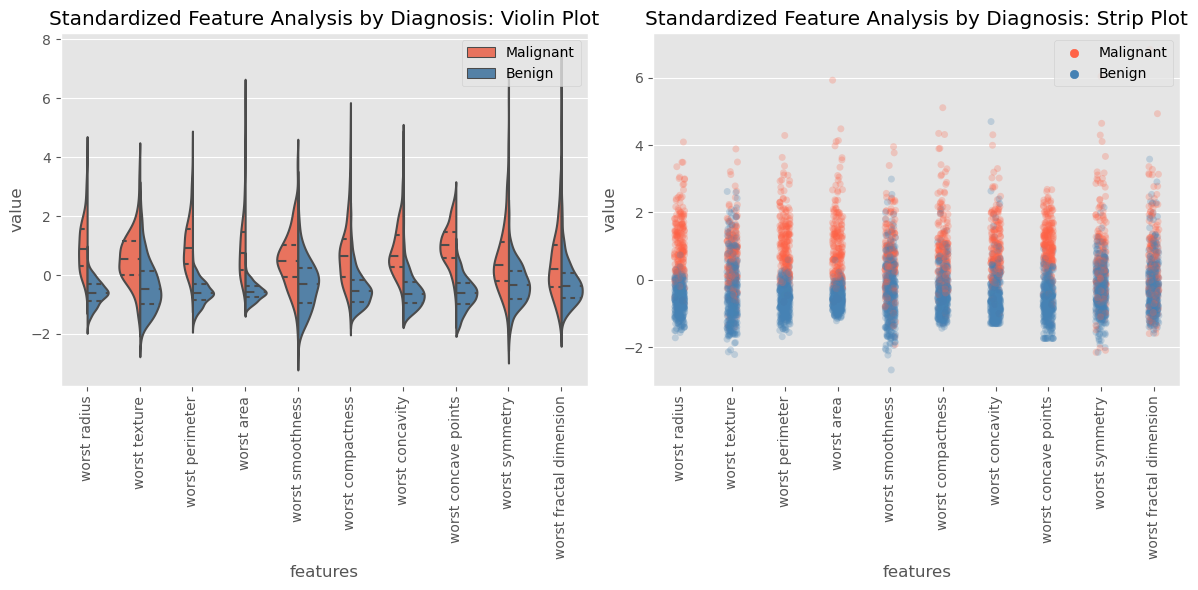

In [13]:
# Crear un DataFrame combinando las features normalizadas de la columna 20 en adelante y la serie 'diagnosis'
data = pd.concat([Z.iloc[:, 20:], diagnosis], axis=1)

# Convertir el DataFrame a un formato adecuado para gráficos de violín y strip
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

# Crear un gráfico de violín y un gráfico de strip para analizar las features normalizadas por diagnóstico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=data, x='features', y='value', hue='diagnosis', split=True, inner='quart', palette={'Benign': 'steelblue', 'Malignant': 'tomato'})
plt.xticks(rotation=90)
plt.title('Standardized Feature Analysis by Diagnosis: Violin Plot')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.stripplot(data=data, x='features', y='value', hue='diagnosis', alpha=0.25, palette={'Benign': 'steelblue', 'Malignant': 'tomato'})
plt.xticks(rotation=90)
plt.title('Standardized Feature Analysis by Diagnosis: Strip Plot')
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

Podemos observar que variables como `mean radius`, `mean perimeter` y `worst radius` parecen ser buenas predictoras, ya que existe una clara diferencia en sus distribuciones según si el diagnóstico es benigno o maligno. En contraste, variables como `mean fractal dimension`, `texture error` y `smoothness error` no parecen ser buenas variables explicativas, ya que no se aprecian diferencias significativas en sus distribuciones según si el diagnóstico es benigno o maligno.

# **Correlation Analysis**

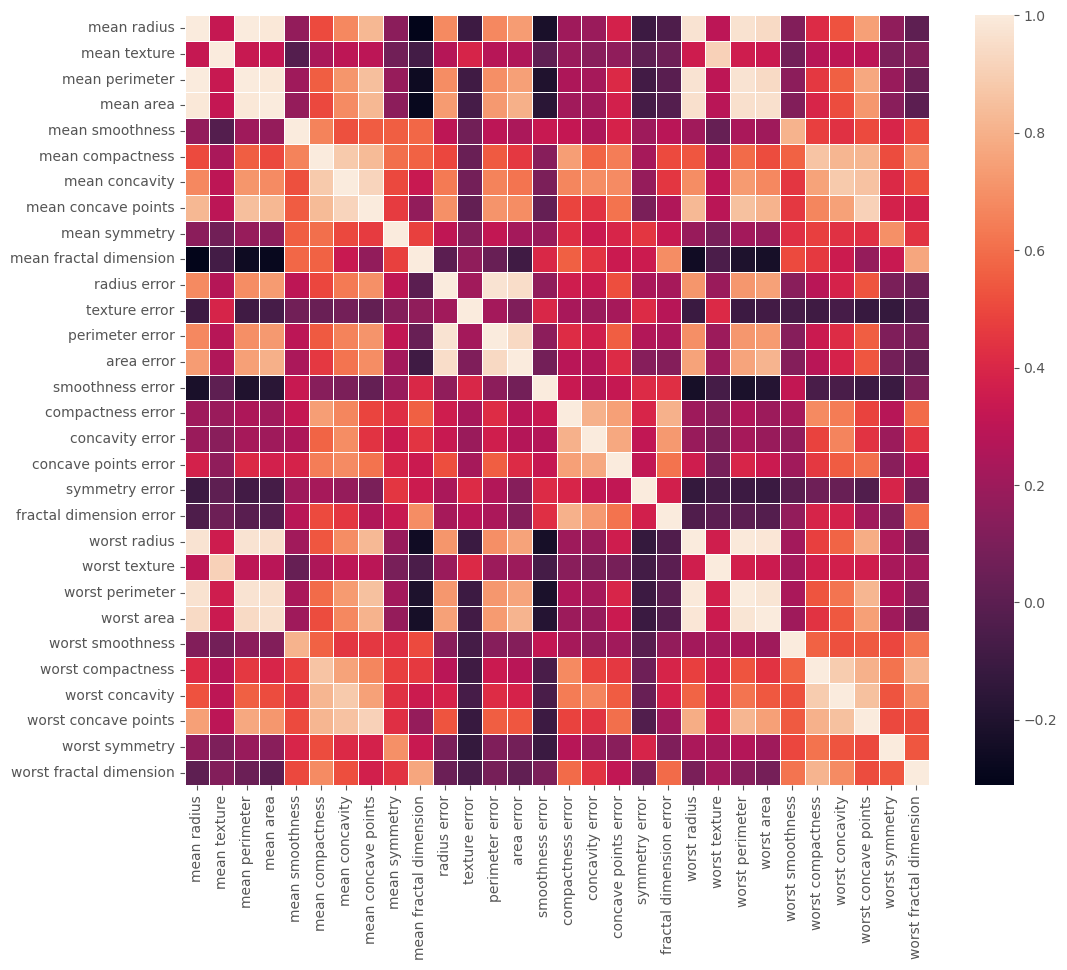

In [14]:
corr = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, linewidths=.5)
plt.show()

Veamos algunas variables altamente correlacionadas un poco más de cerca

<Figure size 600x400 with 0 Axes>

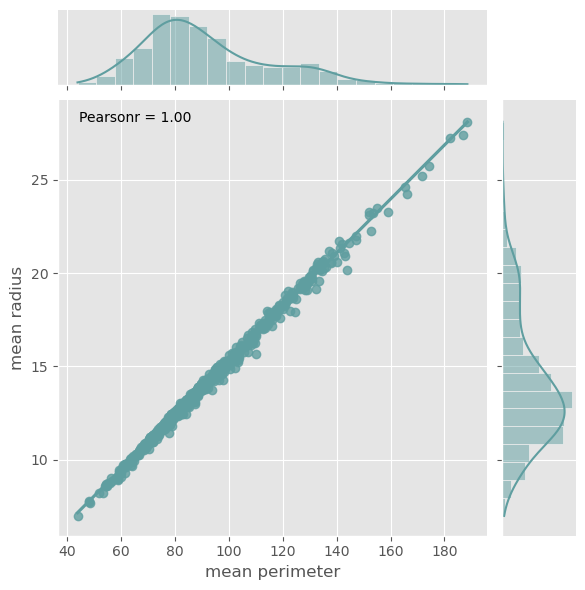

In [15]:
plt.figure(figsize=(6, 4))

# Crear un joint plot con regresión lineal para visualizar la relación entre 'mean perimeter' y 'mean radius'
sns_plot = sns.jointplot(data=X, x='mean perimeter', y='mean radius', kind='reg', color='cadetblue')

# Anotar el coeficiente de correlación de Pearson en el gráfico
sns_plot.ax_joint.annotate(
    f'Pearsonr = {pearsonr(X["mean perimeter"], X["mean radius"])[0]:.2f}',
    xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10
)

plt.show()

<Figure size 600x400 with 0 Axes>

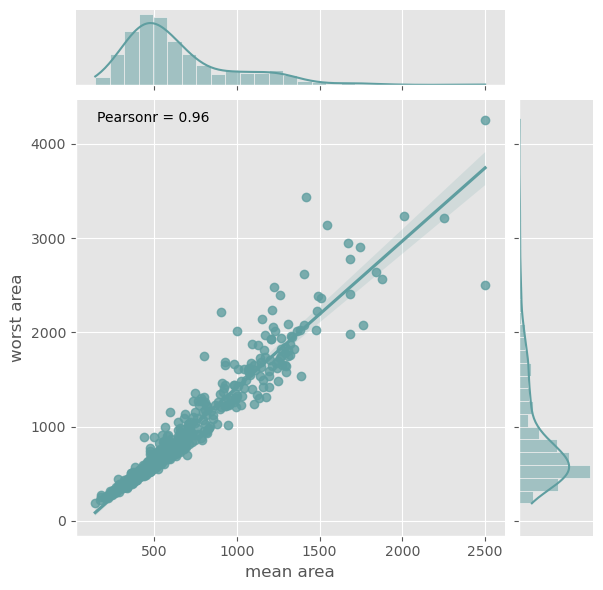

In [16]:
plt.figure(figsize=(6, 4))

# Crear un joint plot con regresión lineal para visualizar la relación entre 'mean area' y 'worst area'
sns_plot = sns.jointplot(data=X, x='mean area', y='worst area', kind='reg', color='cadetblue')

# Anotar el coeficiente de correlación de Pearson en el gráfico
sns_plot.ax_joint.annotate(
    f'Pearsonr = {pearsonr(X["mean area"], X["worst area"])[0]:.2f}',
    xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10
)

plt.show()

<Figure size 600x400 with 0 Axes>

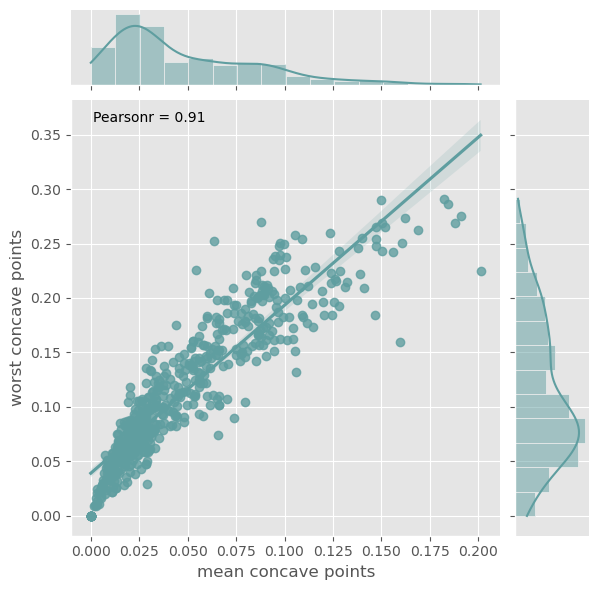

In [17]:
plt.figure(figsize=(6, 4))

# Crear un joint plot con regresión lineal para visualizar la relación entre 'mean concave points' y 'worst concave points'
sns_plot = sns.jointplot(data=X, x='mean concave points', y='worst concave points', kind='reg', color='cadetblue')

# Anotar el coeficiente de correlación de Pearson en el gráfico
sns_plot.ax_joint.annotate(
    f'Pearsonr = {pearsonr(X["mean concave points"], X["worst concave points"])[0]:.2f}',
    xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10
)

plt.show()

Muchas variables están altamente correlacionadas entre si, algunas consecuencias y posibles soluciones son las siguientes:

* Multicolinealidad:

    * Consecuencia: La multicolinealidad, que es una alta correlación entre dos o más variables predictoras, puede causar inestabilidad en los coeficientes estimados por el modelo. Esto hace que los coeficientes sean más sensibles a pequeños cambios en los datos.

    * Solución: Eliminar una de las variables altamente correlacionadas para reducir la multicolinealidad. También se puede utilizar técnicas de regularización que penalizan los coeficientes grandes y pueden ayudar a mitigar la multicolinealidad.

* Redundancia de información:

    * Consecuencia: Variables altamente correlacionadas pueden contener información redundante, ya que proporcionan esencialmente la misma información al modelo.

    * Solución: Eliminar una de las variables redundantes para mejorar la interpretabilidad y eficiencia del modelo. Se pueden utilizar métodos automáticos para la selección de características, como la eliminación recursiva de características o métodos basados en árboles.

* Inestabilidad del modelo:

    * Consecuencia: En SVM, la alta correlación entre variables puede conducir a modelos más sensibles a pequeñas variaciones en los datos de entrenamiento.

    * Solución: Aplicar técnicas de preprocesamiento, como la normalización de variables o la reducción de dimensionalidad mediante técnicas como Análisis de Componentes Principales (PCA). Estas técnicas pueden ayudar a reducir la sensibilidad del modelo a la alta correlación.

* Costo computacional:

    * Consecuencia: Un gran número de variables altamente correlacionadas puede aumentar el costo computacional del modelo sin aportar mucha información adicional.
    
    * Solución: Realizar una selección cuidadosa de características para incluir solo las más relevantes. Se puede utilizar métodos de selección de características basados en la importancia de las variables.

# **Support Vector Machine (SVM)**

In [18]:
# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [19]:
# Crear un pipeline que incluye escalado, selección de features y un clasificador SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=10)),
    ('svc', SVC(class_weight='balanced'))
])

**NOTA**

`SelectKBest` es una técnica de selección de características en el ámbito del Machine Learning y Data Mining. Es una herramienta que ayuda a seleccionar las mejores características de un conjunto de datos en función de alguna métrica específica.

In [20]:
# Entrenar un modelo básico como baseline usando Cross-Validation
pipeline.named_steps['svc'].set_params(kernel='linear')
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.94505495 0.93406593 0.96703297 0.92307692 0.94505495]
Mean CV Score: 0.9428571428571428


In [21]:
# Entrenar un clasificador SVM con kernel lineal
param_grid_linear = {
    'svc__kernel': ['linear'],
    'svc__C': [0.001, 0.1, 1.0, 10.0, 100.0],
}

svc_linear = GridSearchCV(
    pipeline, 
    param_grid_linear, 
    cv=5
)
svc_linear.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector', SelectKBest()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [0.001, 0.1, 1.0, 10.0, 100.0],
                         'svc__kernel': ['linear']})

In [22]:
# Resultados de entrenamiento obtenidos para el clasficador SVM con kernel lineal
svcLinear_results = pd.DataFrame(svc_linear.cv_results_)
svcLinear_results[['param_svc__kernel', 'param_svc__C', 'mean_test_score', 'std_test_score']] \
    .sort_values(by='mean_test_score', ascending=False).reset_index(drop=True).head()

,param_svc__kernel,param_svc__C,mean_test_score,std_test_score
0,linear,0.1,0.942857,0.012815
1,linear,1.0,0.942857,0.014579
2,linear,100.0,0.940659,0.029157
3,linear,10.0,0.936264,0.022413
4,linear,0.001,0.918681,0.030769


In [23]:
# Entrenar un clasificador SVM con kernel polinomial
param_grid_poly = {
    'svc__kernel': ['poly'],
    'svc__C': [0.001, 0.1, 1.0, 10.0, 100.0],
    'svc__degree': [2, 3, 4, 5]
}

svc_poly = GridSearchCV(
    pipeline, 
    param_grid_poly, 
    cv=5
)
svc_poly.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector', SelectKBest()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [0.001, 0.1, 1.0, 10.0, 100.0],
                         'svc__degree': [2, 3, 4, 5], 'svc__kernel': ['poly']})

In [24]:
# Resultados de entrenamiento obtenidos para el clasficador SVM con kernel polinomial
svcPoly_results = pd.DataFrame(svc_poly.cv_results_)
svcPoly_results[['param_svc__kernel', 'param_svc__C' ,'param_svc__degree', 'mean_test_score', 'std_test_score']] \
    .sort_values(by='mean_test_score', ascending=False).reset_index(drop=True).head()

,param_svc__kernel,param_svc__C,param_svc__degree,mean_test_score,std_test_score
0,poly,100.0,3,0.936264,0.025441
1,poly,10.0,3,0.927473,0.025631
2,poly,100.0,5,0.903297,0.023466
3,poly,1.0,3,0.901099,0.025059
4,poly,10.0,5,0.887912,0.028991


In [25]:
# Entrenar un clasificador SVM con kernel RBF
param_grid_rbf = {
    'svc__kernel': ['rbf'],
    'svc__C': [0.001, 0.1, 1.0, 10.0, 100.0],
    'svc__gamma': ['scale', 'auto']
}

svc_rbf = GridSearchCV(
    pipeline, 
    param_grid_rbf, 
    cv=5
)
svc_rbf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector', SelectKBest()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [0.001, 0.1, 1.0, 10.0, 100.0],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['rbf']})

In [26]:
# Resultados de entrenamiento obtenidos para el clasficador SVM con kernel RBF
svcRBF_results = pd.DataFrame(svc_rbf.cv_results_)
svcRBF_results[['param_svc__kernel', 'param_svc__C', 'param_svc__gamma','mean_test_score', 'std_test_score']] \
    .sort_values(by='mean_test_score', ascending=False).reset_index(drop=True).head()

,param_svc__kernel,param_svc__C,param_svc__gamma,mean_test_score,std_test_score
0,rbf,10.0,scale,0.958242,0.018906
1,rbf,10.0,auto,0.958242,0.018906
2,rbf,100.0,scale,0.951648,0.017855
3,rbf,100.0,auto,0.951648,0.017855
4,rbf,1.0,scale,0.942857,0.008223


Para evaluar el desempeño del modelo utilizaremos las funciones `confusion_matrix` y `classification_report` de `scikit-learn`

**Confusion Matrix:**

La matriz de confusión es una tabla que se utiliza en problemas de clasificación para describir el rendimiento de un modelo. En el contexto de una clasificación binaria (dos clases), la matriz tiene cuatro entradas:

 - **True Positives ($TP$):** Son los casos en los que el modelo predijo correctamente que la instancia pertenece a la clase positiva.

- **True Negatives ($TN$):** Representa los casos en los que el modelo predijo correctamente que la instancia no pertenece a la clase positiva.

- **False Positives ($FP$):** Estos son los casos en los que el modelo predijo incorrectamente que la instancia pertenece a la clase positiva cuando, en realidad, no lo hace. También se le conoce como *"Error de Tipo I"*.

- **False Negatives ($FN$):** Son los casos en los que el modelo predijo incorrectamente que la instancia no pertenece a la clase positiva cuando, en realidad, sí lo hace. También se le conoce como *"Error de Tipo II"*.

La matriz de confusión tiene la siguiente forma:

\begin{matrix}
TN & FP \\
FN & TP \\
\end{matrix}

**Classification Report**

La función `classification_report`  proporciona un resumen de varias métricas de rendimiento:

- **Precision:** Mide la proporción de verdaderos positivos entre todas las instancias predichas como positivas. Se calcula como $$\text{Precision} = \frac{TP}{TP + FP}$$ Una alta precisión indica que el modelo tiene menos falsos positivos.

- **Recall:** Mide la proporción de verdaderos positivos entre todas las instancias que realmente son positivas. Se calcula como $$\text{Recall} = \frac{TP}{TP + FN}$$ Un alto recall indica que el modelo captura la mayoría de los positivos reales.

- **F1-Score:** Es la media armónica entre precision y recall. Se calcula como $$\text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

- **Support:** Es el número real de ocurrencias de la clase en los datos de prueba.

- **Accuracy:** Mide la proporción de instancias correctamente clasificadas. Se calcula como $$\frac{TP + TN}{TP + TN + FP + FN}$$ El accuracy puede ser engañoso si las clases estan desequilibradas.

- **Macro Avg**: Es el promedio sin ponderar de las métricas para cada clase.

- **Weighted Avg**: Es el promedio ponderado de las métricas para cada clase, según el soporte de cada clase.







In [27]:
def results(y: np.ndarray, y_pred: np.ndarray) -> None:
    '''
    Evalúa los resultados de un modelo de clasificación binaria 
    mostrando una matriz de confusión y un informe de clasificación.
    '''

    cm = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y, y_pred), 
        display_labels=['Malignant', 'Benignt']
    )
    cm.plot(cmap='Blues')

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.grid(False)

    plt.show()

    print(classification_report(y, y_pred))

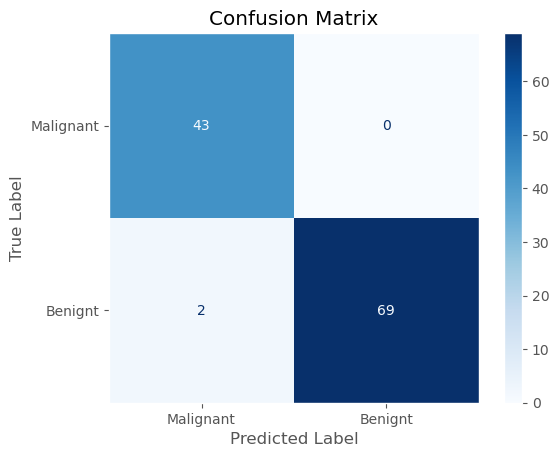

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.97      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [28]:
# Resultados del clasificador SVM con kernel lineal en el conjunto de test
results(y_test, svc_linear.best_estimator_.predict(X_test))

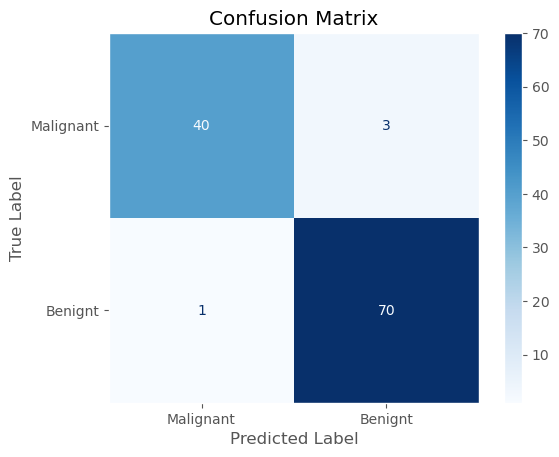

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [29]:
# Resultados del clasificador SVM con kernel polinomial en el conjunto de test
results(y_test, svc_poly.best_estimator_.predict(X_test))

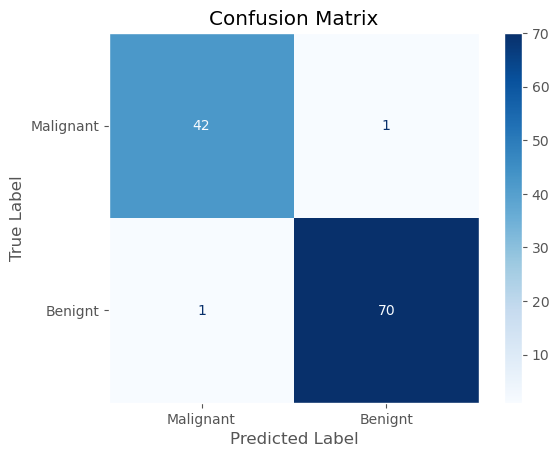

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [30]:
# Resultados del clasificador SVM con kernel RBF en el conjunto de test
results(y_test, svc_rbf.best_estimator_.predict(X_test))

**CONCLUSIÓN**

Al aplicar el algoritmo de Support Vector Machine (SVM) al conjunto de datos Breast Cancer Wisconsin para abordar un problema de clasificación binaria, observamos que el rendimiento se mantiene sólido independientemente del tipo de kernel utilizado. Tanto con un kernel lineal, polinómico o radial (RBF), los resultados obtenidos exhiben consistencia.

Este descubrimiento sugiere que el modelo SVM muestra robustez y es capaz de manejar la complejidad intrínseca de este conjunto de datos. Proporciona una notable capacidad de separación entre las clases, lo que subraya su idoneidad para abordar problemas de clasificación en este contexto específico.

# **Extra: Principal Component Analysis (PCA)**

In [31]:
# Crear una instancia de PCA (Análisis de Componentes Principales)
pca = PCA()

# Aplicar PCA y transformar el conjunto de datos normalizado (Z)
pca_matrix = pca.fit_transform(Z)

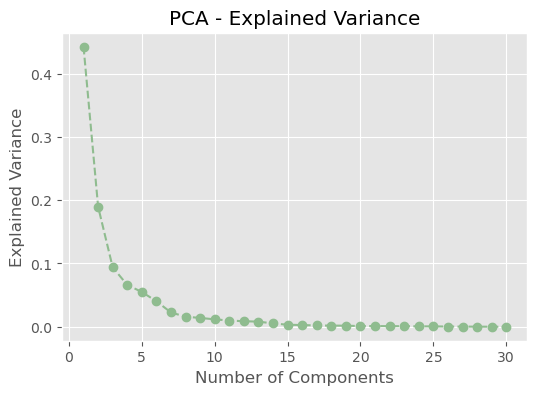

In [32]:
# Crear un gráfico de la varianza explicada por las componentes principales
plt.figure(figsize=(6, 4))

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='darkseagreen')

plt.title("PCA - Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

plt.show()

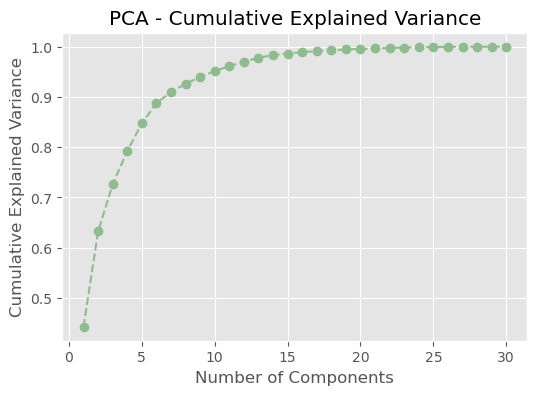

In [33]:
# Crear un gráfico de la varianza explicada acumulada por las componentes principales
plt.figure(figsize=(6, 4))

plt.plot(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='darkseagreen')

plt.title('PCA - Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

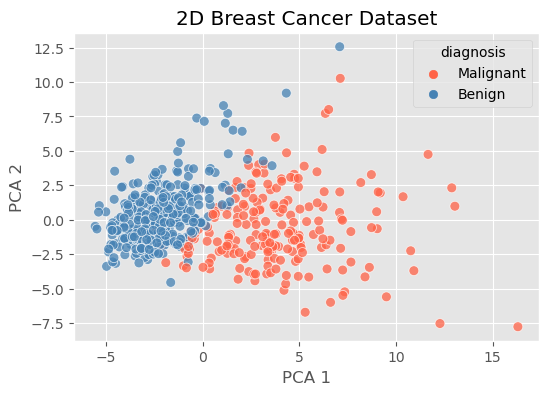

In [34]:
# Crear un DataFrame con las dos primeras componentes principales y la serie 'diagnosis'
df_pca_2d = pd.DataFrame(data=pca_matrix[:, :2], columns=['PC1', 'PC2'])
df_pca_2d['diagnosis'] = diagnosis

# Crear un gráfico de dispersión en 2D de las dos primeras componentes principales
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='diagnosis', palette={'Benign': 'steelblue', 'Malignant': 'tomato'}, s=50, alpha=0.75)

plt.title('2D Breast Cancer Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()